In [1]:
# DataCamp Exercise
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
data = pd.read_excel('iris_reproducible.xlsx')
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

In [15]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41) # 70% training and 30% test

In [22]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [24]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_train,  clf.predict(X_train))*100)

Accuracy: 0.9
Accuracy: 100.0


In [18]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.432701
petal width (cm)     0.425739
sepal length (cm)    0.102160
sepal width (cm)     0.039400
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


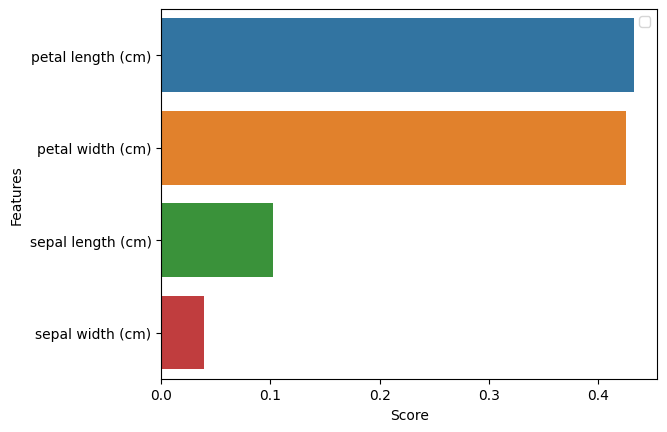

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Score')
plt.ylabel('Features')
plt.legend()
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 3],
}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10}


In [21]:
# Re-evaluate the performance of the model with the best parameters
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy after Grid Search:", acc)

Accuracy after Grid Search: 0.9333333333333333
